<a href="https://colab.research.google.com/github/tqnhu2407/sarcasm_detector_using_embeddings/blob/main/Result_Sarcasm_Detector_using_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from bs4 import BeautifulSoup
import string
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json
import numpy as np
import matplotlib.pyplot as plt

# Reading JSON input file and Tokenizing

In [ ]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']

In [ ]:
def split_train_test(stopwords, training_size, vocab_size, max_len):

    table = str.maketrans('', '', string.punctuation)
    sentences = []
    labels = []
    urls = []


    with open('Sarcasm_Headlines_Dataset.json', 'r') as f:
        for line in f:
            obj = json.loads(line)
            sentence = obj['headline'].lower()
            sentence = sentence.replace(",", " , ")
            sentence = sentence.replace(".", " . ")
            sentence = sentence.replace("-", " - ")
            sentence = sentence.replace("/", " / ")
            soup = BeautifulSoup(sentence)
            sentence = soup.get_text() # remove HTML tags
            words = sentence.split()
            filtered_sentence = ""
            for word in words:
                word = word.translate(table) # remove punctuation
                if word not in stopwords: # remove stop words
                    filtered_sentence = filtered_sentence + word + " "
            sentences.append(filtered_sentence)
            urls.append(obj['article_link'])
            labels.append(obj['is_sarcastic'])

    training_sentences = sentences[0:training_size]
    testing_sentences = sentences[training_size:]
    training_labels = labels[0:training_size]
    testing_labels = labels[training_size:]

    tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
    tokenizer.fit_on_texts(training_sentences)

    training_sequences = tokenizer.texts_to_sequences(training_sentences)
    training_padded = pad_sequences(training_sequences, maxlen=max_len, padding='post', truncating='post')

    tokenizer.fit_on_texts(testing_sentences)
    testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
    testing_padded = pad_sequences(testing_sequences, maxlen=max_len, padding='post', truncating='post')

    training_padded = np.array(training_padded)
    training_labels = np.array(training_labels)
    testing_padded = np.array(testing_padded)
    testing_labels = np.array(testing_labels)

    return training_padded, testing_padded, training_labels, testing_labels, tokenizer, sentences

In [ ]:
training_size = 23000

In [ ]:
vocab_size = 2000

In [ ]:
max_len= 85

In [ ]:
training_padded, testing_padded, training_labels, testing_labels, tokenizer, sentences = split_train_test(stopwords, training_size, vocab_size, max_len)

# Training model

In [ ]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('epoch')
    plt.ylabel('acccuracy')
    plt.show()

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

* Adjusting the learning rate
* Reducing the vocab_size from 20,000 to 2,000
* Reducing the embedding dimension to 7
* Choosing the number of neurons in the dense layer to 8
* Using regularization L2
* Choosing the max_len of the sentences to be 85

In [ ]:
model = tf.keras.Sequential([
                        tf.keras.layers.Embedding(vocab_size, 7),
                        tf.keras.layers.GlobalAveragePooling1D(),
                        tf.keras.layers.Dense(8, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01)),
                        tf.keras.layers.Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False) # default = 0.001
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
history = model.fit(training_padded, training_labels, validation_split=0.33, epochs=100)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 7)           14000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 7)                 0         
_________________________________________________________________
dense (Dense)                (None, 8)                 64        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 14,073
Trainable params: 14,073
Non-trainable params: 0
_________________________________________________________________


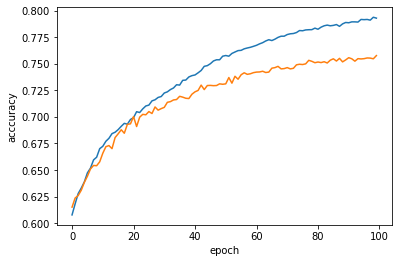

In [ ]:
plot_accuracy(history)

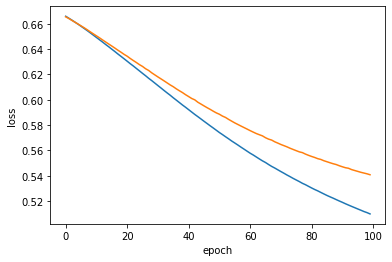

In [ ]:
plot_loss(history)

# Using the Model to Classify a Sentence

In [ ]:
sentences = ["granny starting to fear spiders in the garden might be real",
            "game of thrones season finale showing this sunday night",
            "TensorFlow book will be a best seller"]

In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)

In [ ]:
print(sequences)

[[1, 760, 1, 738, 1, 1, 1, 1, 293, 1, 96], [124, 1, 1335, 167, 1, 1, 1, 1519, 150], [1, 223, 1, 1, 1, 44, 1]]


In [ ]:
padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [ ]:
print(padded)

[[   1  760    1  738    1    1    1    1  293    1   96    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [ 124    1 1335  167    1    1    1 1519  150    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   1  223    1    1    1   44    1    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0  

In [ ]:
print(model.predict(padded))

[[0.66325116]
 [0.3883087 ]
 [0.32005945]]


# Saving model

In [ ]:
model.save('drive/MyDrive/Colab Notebooks/Side-project/my_model.h5')